## Approach

1. Identify available dates and temporal frequency of observations for the given data. The collection processed in this notebook is the Atmospheric Carbon Dioxide Concentrations from NOAA Global Monitoring Laboratory.
2. Visualize the time series data

   

## About the Data

The Global Greenhouse Gas Reference Network (GGGRN) for the Carbon Cycle and Greenhouse Gases (CCGG) Group is part of NOAA'S Global Monitoring Laboratory (GML) in Boulder, CO. The Reference Network measures the atmospheric distribution and trends of the three main long-term drivers of climate change, carbon dioxide (CO₂), methane (CH₄), and nitrous oxide (N2O), as well as carbon monoxide (CO) and many other trace gases which help interpretation of the main GHGs. The Reference Network measurement program includes continuous in-situ measurements at 4 baseline observatories (global background sites) and 8 tall towers, as well as flask-air samples collected by volunteers at over 50 additional regional background sites and from small aircraft conducting regular vertical profiles. The air samples are returned to GML for analysis where measurements of about 55 trace gases are done. NOAA's GGGRN maintains the World Meteorological Organization international calibration scales for CO₂, CH₄, CO, N2O, and SF6 in air. The measurements from the GGGRN serve as a comparison with measurements made by many other international laboratories, and with regional studies. They are widely used in modeling studies that infer space-time patterns of emissions and removals of greenhouse gases that are optimally consistent with the atmospheric observations, given wind patterns. These data serve as an early warning for climate "surprises". The measurements are also helpful for the ongoing evaluation of remote sensing technologies.

## Installing the required libraries
Please run the cell below to install the libraries required to run this notebook.

In [34]:
%pip install matplotlib
%pip install pandas
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing required libraries

In [35]:
import numpy as np
import pandas as pd
from glob import glob
from io import StringIO
import matplotlib.pyplot as plt
import requests

## Reading the NOAA data from GitHub repo

In [36]:
github_repo_owner = "NASA-IMPACT"
github_repo_name = "noaa-viz"
folder_path_ch4, folder_path_co2 = "flask/ch4", "flask/c02"
combined_df_co2, combined_df_ch4 = pd.DataFrame(), pd.DataFrame()


# Function to fetch and append a file from GitHub
def append_github_file(file_url):
    response = requests.get(file_url)
    response.raise_for_status()
    return response.text

# Get the list of CH4 files in the specified directory using GitHub API
github_api_url = f"https://api.github.com/repos/{github_repo_owner}/{github_repo_name}/contents/{folder_path_ch4}"
response = requests.get(github_api_url)
response.raise_for_status()
file_list_ch4 = response.json()

# Get the list of CO2 files in the specified directory using GitHub API
github_api_url = f"https://api.github.com/repos/{github_repo_owner}/{github_repo_name}/contents/{folder_path_ch4}"
response = requests.get(github_api_url)
response.raise_for_status()
file_list_co2 = response.json()

## Concatenating the CH4 data into a single DataFrame

In [37]:
for file_info in file_list_ch4:
    if file_info["name"].endswith("txt"):
        file_content = append_github_file(file_info["download_url"])
        Lines = file_content.splitlines()
        index = Lines.index("# VARIABLE ORDER")+2
        df = pd.read_csv(StringIO("\n".join(Lines[index:])), delim_whitespace=True)
        combined_df_ch4 = pd.concat([combined_df_ch4, df], ignore_index=True)
        

## Concatenating the CO2 data into a single DataFrame

In [38]:
for file_info in file_list_co2:
    if file_info["name"].endswith("txt"):
        file_content = append_github_file(file_info["download_url"])
        Lines = file_content.splitlines()
        index = Lines.index("# VARIABLE ORDER")+2
        df = pd.read_csv(StringIO("\n".join(Lines[index:])), delim_whitespace=True)
        combined_df_co2 = pd.concat([combined_df_co2, df], ignore_index=True)
        

## Visualizing the NOAA data for CH4 and CO2

/var/folders/7b/5rrvrjx51l54jchgs0tqps0c0000gn/T/ipykernel_66140/2606016741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])


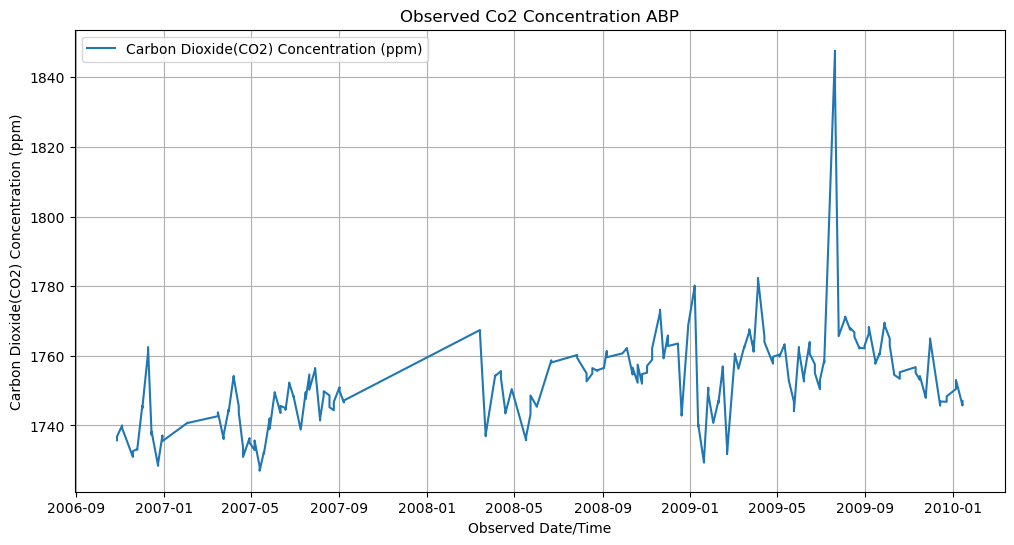

In [39]:
site_to_filter = 'ABP'
filtered_df = combined_df_co2[combined_df_co2['site_code'] == site_to_filter]

filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])

# Set the "Date" column as the index
filtered_df.set_index('datetime', inplace=True)

# Create a time series plot for 'Data' and 'Value'
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['value'], label='Carbon Dioxide(CO2) Concentration (ppm)')
plt.xlabel("Observed Date/Time")
plt.ylabel("Carbon Dioxide(CO2) Concentration (ppm)")
plt.title(f"Observed Co2 Concentration {site_to_filter}")
plt.legend()
plt.grid(True)
# plt.show()


/var/folders/7b/5rrvrjx51l54jchgs0tqps0c0000gn/T/ipykernel_66140/1635934907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])


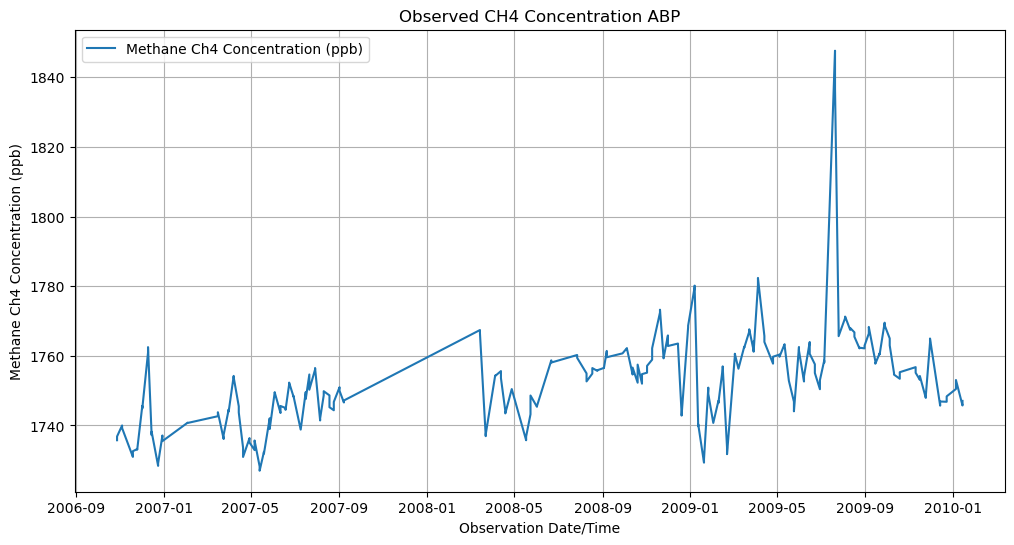

In [40]:
site_to_filter = 'ABP'
filtered_df = combined_df_ch4[combined_df_ch4['site_code'] == site_to_filter]
filtered_df['datetime'] = pd.to_datetime(filtered_df['datetime'])

# Set the "Date" column as the index
filtered_df.set_index('datetime', inplace=True)

# Create a time series plot for 'Data' and 'Value'
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df['value'], label='Methane Ch4 Concentration (ppb)')
plt.xlabel("Observation Date/Time")
plt.ylabel("Methane Ch4 Concentration (ppb)")
plt.title(f"Observed CH4 Concentration {site_to_filter}")
plt.legend()
plt.grid(True)
plt.show()

## Summary

In this notebook we have successfully visualized the data for Atmospheric Carbon Dioxide Concentrations from NOAA Global Monitoring Laboratory.